## **Latar Belakang**

A-Mart supermarket merupakan perusahaan bisnis retail yang menjual berbagai produk kebutuhan sehari-hari. Barang yang dijual meliputi produk makanan, minuman, olahan daging, minuman beralkohol, dan emas. Pada dasarnya, customer akan belanja kebutuhan sehari-hari setiap harinya atau bahkan terjadwal setiap bulan. Pembelian ini dapat melalui website, katalog, dan secara langsung ke supermarket.

Pembelian kebutuhan sehari-hari berdasarkan dari keadaan customer. Keadaan customer dalam hal status, kepemilikan anak atau remaja, dan loyalitas customer mempengaruhi produk yang dibeli di supermarket. Hal ini berdampak pada operasional supermarket.

## **Pernyataan Masalah**

Dalam mengelola supermarket, perusahaan perlu memastikan bahwa operasionalnya efisien untuk memenuhi kebutuhan customernya. Selain itu, strategi pemasaran yang efektif sangatlah penting dalam meningkatkan penjualan kedepannya. Bagaimana A-Mart dapat lebih aktif menggunakan data pelanggan untuk meningkatkan layanan, menyesuaikan penawaran promosi, dan menciptakan pengalaman belanja untuk meningkatkan penjualan?


<!-- Dalam mengelola supermarket, perusahaan perlu memastikan bahwa operasionalnya efisien untuk memenuhi kebutuhan customernya. Hal ini memicu perusahaan dalam menganalisa persediaan data stok untuk memperbanyak atau mengurangi stok produk berdasarkan keadaan customer. Selain itu, strategi pemasaran yang efektif sangatlah penting dalam meningkatkan penjualan kedepannya.  -->

## **Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime

C:\Users\Annisa\AppData\Local\Temp\ipykernel_1672\3901773327.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Dataset menginformasikan identitas pribadi customer, jenis produk, media penjualan, dan penawaran yang diadakan oleh A-Mart supermarket. Secara detail, terdapat 29 kolom yang dibagi menjadi 4 kategori pada dataset Supermarket Customers, meliputi:

### Identitas
- ID : nomor unik customer
- Year_Birth : tahun lahir customer
- Education : level pendidikan customer
- Marital_Status : status pernikahan customer
- Income : pendapatan customer
- Kidhome : banyaknya anak-anak di rumah tangga customer
- Teenhome : banyaknya remaja di rumah tangga customer
- Dt_Customer : tanggal customer bergabung dengan perusahaan
- Recency : jarak hari dari pembelian terakhir hingga sekarang
- Complain : (1) customer complain dengan rentang waktu 2 tahun terkhir ; (0) lain-lain

### Produk
- MntWines : jumlah belanja wine dalam 2 tahun terakhir
- MntFruits : jumlah belanja buah dalam 2 tahun terakhir
- MntMeatProducts : jumlah belanja produk daging dalam 2 tahun terakhir
- MntFishProducts : jumlah belanja produk ikan dalam 2 tahun terakhir
- MntSweetProducts : jumlah belanja produk manis dalam 2 tahun terakhir
- MntGoldProds : jumlah belanja emas dalam 2 tahun terakhir

### Promosi
- NumDealsPurchases : jumlah pembelian dengan adanya diskon
- AcceptedCmp1 : (1) menerima tawaran diskon di putaran ke-1 ; (0) lain-lain
- AcceptedCmp2 : (1) menerima tawaran diskon di putaran ke-2 ; (0) lain-lain
- AcceptedCmp3 : (1) menerima tawaran diskon di putaran ke-3 ; (0) lain-lain
- AcceptedCmp4 : (1) menerima tawaran diskon di putaran ke-4 ; (0) lain-lain
- AcceptedCmp5 : (1) menerima tawaran diskon di putaran ke-5 ; (0) lain-lain

### Media Penjualan
- NumWebPurchases : jumlah pembelian melalui website perusahaan
- NumCatalogPurchases : jumlah pembelian melalui katalog
- NumStorePurchases : jumlah pembelian secara langsung ke supermarket
- NumWebVisitsMonth : jumlah kunjungan ke webaite perusahaan dalam sebulan terakhir

In [2]:
# DATA SUPERMARKET CUSTOMER
data_cust = pd.read_csv('Supermarket Customers.csv',sep='\t') #untuk melacak \t merupakan pemisah
data_cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# KESELURUHAN KOLOM
data_cust.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## **Data Understanding dan Cleaning**

*Data understanding* sangat diperlukan dalam mengenal data yang dimiliki. Sebuah dataset akan memiliki banyak insight dan tentunya memiliki banyak anomali. Hal ini yang menyebabkan adanya data dump atau data mentah. Dalam menanganinya, diperlukan tahapan *data cleaning* untuk meminimalisir adanya anomali dari data yang akan di analisis. Tahapan *data cleaning* dapat berupa menyortir, menyusun, menghapus, mengisi *missing value* dan memprosesnya lebih lanjut.

In [4]:
# MENCARI RINGKASAN INFORMASI DATASET
data_cust.info()
print(f"Terdapat jumlah baris dan kolom di data set supermarket customer sebanyak {data_cust.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# MENCARI RINGKASAN DATASET YANG BERUPA INT DAN OBJ
display(data_cust.describe()) #int
data_cust.describe(include= 'object') #obj

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
# MENCARI UNIQUE DI SETIAP KOLOM
df = pd.DataFrame(data_cust)

t_unique = []

for column in df.columns:
    t_unique.append([column, data_cust[column].dtype, data_cust[column].nunique(), data_cust[column].unique()])
    
unique_values = pd.DataFrame(columns=['Column Name','Tipe Data','Data Unique','Nilai Unique'],data=t_unique)
unique_values

,Column Name,Tipe Data,Data Unique,Nilai Unique
0,ID,int64,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,3,"[0, 1, 2]"
6,Teenhome,int64,3,"[0, 1, 2]"
7,Dt_Customer,object,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,int64,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


<!-- PENJELASN DATA UNIQUE -->

**Penjelasan hasil output data understanding:**
- Dataset supermarket customer memiliki 29 kolom dan 2240 baris. 
- Terdapat satu kolom yang hanya memiliki data kosong, yaitu kolom `Income`.
- Tipe data kolom `Dt_Customer` berupa object dan tipe data kolom `Year_Birth` berupa integer. Dari hasil values data, seharusnya kedua kolom ini memiliki tipe data datetime karena menyimpan informasi tanggal, waktu, dan tahun.
- Hasil nilai data unique, kolom `Education` dan `Marital_Status` memiliki values yang tidak umum. Kolom `Education` memiliki values: Graduation, PhD, Master, Basic, 2n Cycle. Sedangkan kolom `Marital_Status` memiliki values: Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO.
- Kolom `Z_CostContact` dan `Z_Revenue` masing-masing hanya memiliki 1 value yang tidak relevan untuk digunakan dalam tahapan analisis. Kedua kolom ini akan di drop dari dataset.

### Missing Value

Mencari persentase dan jumlah dari missing value yang ada di dataset.

In [7]:
# MENCARI MISSING VALUE
display(data_cust.isna().sum()/data_cust.shape[0]*100) #persentase
display(data_cust.isna().sum()) #jumlah
print(f"Kolom yang memiliki missing value, yaitu: {data_cust.columns[data_cust.isnull().any()]}")

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Kolom yang memiliki missing value, yaitu: Index(['Income'], dtype='object')


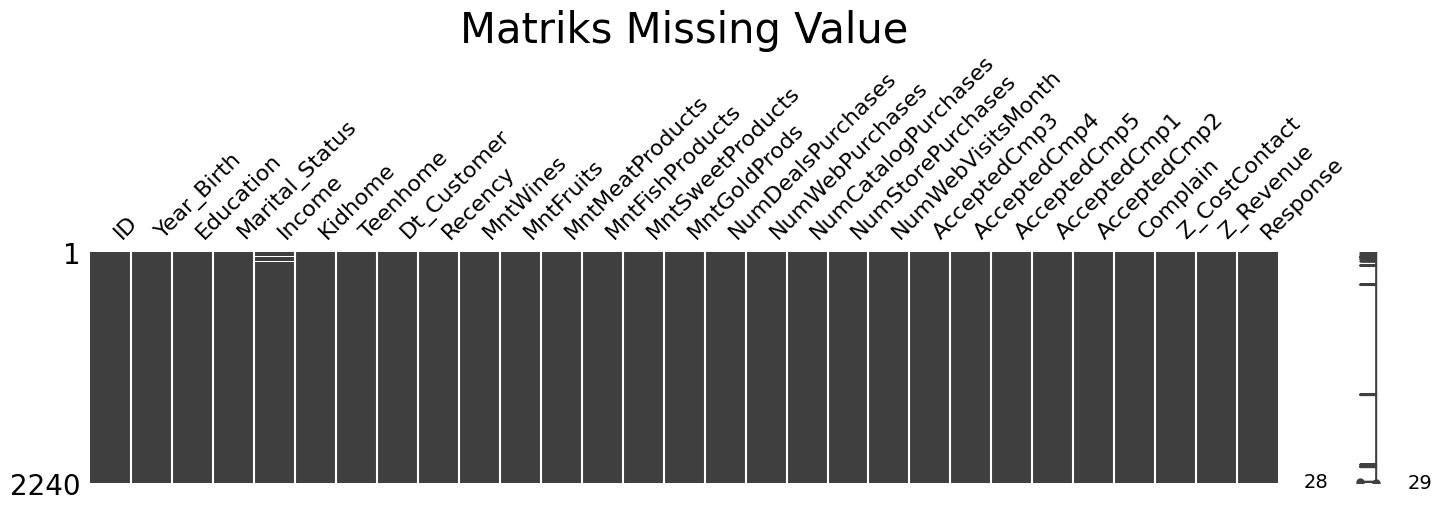

In [8]:
# DIAGRAM MISSING VALUE
msno.matrix(data_cust, figsize=(17,3))
plt.title('Matriks Missing Value', size=30)
plt.show()

**Penjelasan hasil output *missing value*:**
- Hanya kolom `Income` sebanyak 24 data yang memiliki *missing values*. Persentase *missing value* dari kolom `Income` hanya 1% terbilang sangat rendah. 
- Diagram Matriks Missing Value menjelaskan bahwasannya kolom `Income` yang memiliki data kosong tidak berkaitan dengan kolom-kolom lainnya.

Penanganan *missing value* pada kolom `Income` mengisi menggunakan nilai median dari kolom yang berkaitan. Nilai medium digunakan karena kolom `Income` memiliki outliers dan tidak terdistribusi normal. Jenis outliers pada kolom `Income` termasuk right skewed terlihat dari diagram berikut:

<!-- tidak di drop yang missing value karena datasetnya sedikit -->
<!-- menggunakan median karena data memiliki outlier dan tidak terdistribusi normal -->

C:\Users\Annisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


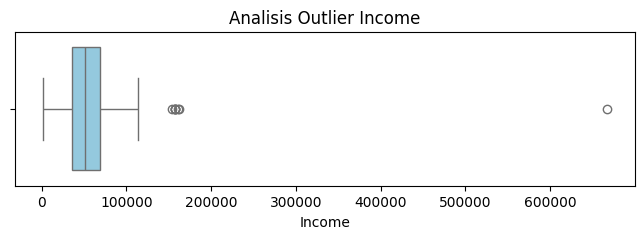

In [9]:
# DIAGRAM OUTLIER INCOME
plt.figure(figsize=(8,2))
sns.boxplot(x=data_cust['Income'], color='skyblue')
plt.title('Analisis Outlier Income')
plt.xlabel('Income')
plt.show()

**Penanganan *missing value* pada kolom `Income`, yaitu:**

In [10]:
# INPUT MEDIAN FILL INCOME'S MISSING VALUE
income_fill = data_cust['Income'].median()
data_cust['Income'].fillna(income_fill, inplace=True)

print(f"Kolom yang memiliki missing value, yaitu: {data_cust.columns[data_cust.isnull().any()]}")

Kolom yang memiliki missing value, yaitu: Index([], dtype='object')


C:\Users\Annisa\AppData\Local\Temp\ipykernel_1672\703984025.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cust['Income'].fillna(income_fill, inplace=True)


- Penanganan *misisng value* sudah teratasi dengan menggunakan median atau nilai tengah dari values kolom `Income` yang telah diurutkan.

### Mengubah Tipe Data

Kolom `Dt_Customer` dan `Year_Birth` memiliki anomali pada tipe datanya. Dalam penanganannya, kedua kolom tersebut seharusnya memiliki tipe data datetime.


Tipe data kolom `Dt_Customer` berupa object dan tipe data kolom `Year_Birth` berupa integer. Dari values data yang ada, seharusnya kedua kolom ini memiliki tipe data datetime karena menyimpan informasi tanggal, waktu, dan tahun.

**Penanganan pengubahan tip data yang tertera menjadi tipe data datetime, yaitu:**

In [11]:
# MENGUBAH OBJ - DATETIME
data_cust['Dt_Customer'] = pd.to_datetime(data_cust['Dt_Customer'], format= '%d-%m-%Y')

In [12]:
# MENGUBAH INT - DATETIME
data_cust['Year_Birth'] = pd.to_datetime(data_cust['Year_Birth'], format= '%Y')

data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

- Pengubahan tipe data pada kolom `Dt_Customer` dan `Year_Birth` menjadi tipe data datetime sudah sesuai dengan ketentuan tipe data. Serta dapat memudahkan dalam operasi matematika jika diperlukan.

### Anomali Value
Pada kolom `Education` memiliki values yang tidak sesuai dari tingkat pendidikan. Values berupa Graduation, PhD, Master, Basic, 2n Cycle. Tingkatan pendidikan masing-masing memiliki arti, yaitu:

- Basic --> merupakan tingkatan pendidikan awal, dapat dikatakan sebagai sekolah dasar.

- 2n cycle --> tingkat pendidikan tinggi setelah gelar sarjana / siklus pertama atau merujuk gelar master's degree.

- Graduation --> lulus dari suatu tingkatan pendidikan. Pada tingkat sarjana dinamakan undergraduate, dimungkinkan merujuk pada gelar sarjana / bachelor's degree

- Master --> master degree atau studi pascasarjana setelah lulus dari gelar sarjana.

- PhD --> tingkatan pendidikan tertinggi, disebut sebagai gelar doktor.

In [13]:
data_cust['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [14]:
# MENGHITUNG BANYAKNYA EDUCATION SETIAP TINGKATAN
data_cust[['Education']].value_counts()

Education 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

**Penanganan anomali values pada kolom `Education`, yaitu:**

In [15]:
# MENGGABUNGKAN VALUES 2N CYCLE DENGAN VALUES MASTER
data_cust['Education'] = data_cust['Education'].replace('2n Cycle', 'Master')

# MENGUBAH VALUES GRADUATION KE BACHELOR
data_cust['Education'] = data_cust['Education'].replace('Graduation', 'Bachelor')

data_cust[['Education']].value_counts()

Education
Bachelor     1127
Master        573
PhD           486
Basic          54
Name: count, dtype: int64

- Pada kolom `Education` dengan values 2n Cycle diubah ataupun digabungkan dengan values master. Melihat pengertian dari 2n Cycle sendiri merujuk pada tingkatan setelah bachelor degree yang berarti tingkatan pendidikan master degree.
- Kolom `Education` dengan values graduation diubah menjadi bachelor atau sama saja dengan undergraduate. Pengertian Graduation yang tidak spesifik umumnya merujuk pada undergraduate.

Values dari kolom `Marital_Status` tidak sesuai dengan status pernikahan pada umumnya. Values yang ada terdiri dari Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO. Pengertian dari masing-masing values marital status, berikut:

- Single --> status seseorang yang belum menikah atau tidak memiliki ikatan pernikahan

- Together --> Pasangan yang tinggal bersama tanpa adanya status pernikahan resmi. Terbilang hubungan pacaran atau pasangan yang memilih untuk hidup bersama.

- Married --> seseorang yang telah resmi menikah dan memiliki ikatan pernikahan sah.

- Divorced --> seseorang yang telah mengalami perceraian dari proses hukum atau resmi yang mengakhiri pernikahan.

- Widow --> seorang wanita yang suaminya telah meninggal dunia dan tidak menikah lagi.

- Alone --> seseorang yang hidup sendiri tanpa pasangan, tidak mementingkan status pernah menikah atau tidak.

- Absurd --> istilah ini tidak umum digunakan pada ranah marital status.

- YOLO --> tidak ada keterkaitan dengan status pernikahan. YOLO (you only live once) yang artinya lebih berkaitan dengan semangat hidup dan pengalaman

In [16]:
data_cust['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
# MENGHITUNG BANYAKNYA MARITAL STATUS SETIAP STATUSNYA
data_cust[['Marital_Status']].value_counts()

Marital_Status
Married           864
Together          580
Single            480
Divorced          232
Widow              77
Alone               3
Absurd              2
YOLO                2
Name: count, dtype: int64

**Penanganan anomali values pada kolom `Marital_Status`, yaitu:**

In [18]:
# MENGGABUNGKAN VALUES SINGLE DENGAN VALUES ALONE
data_cust['Marital_Status'] = data_cust['Marital_Status'].replace('Alone', 'Single')

# MENGUBAH VALUES ABSURD DAN YOLO MENJADI OTHERS
data_cust['Marital_Status'] = data_cust['Marital_Status'].replace(['Absurd','YOLO'],'Others')

data_cust[['Marital_Status']].value_counts()

Marital_Status
Married           864
Together          580
Single            483
Divorced          232
Widow              77
Others              4
Name: count, dtype: int64

- Pada kolom `Marital_Status` dengan values Alone diubah ataupun digabungkan dengan values Single. Dikarenakan pengertian alone dan single hidup tanpa atau belum dengan pasangan dan adanya ikatan pernikahan.
- Kolom `Marital_Status` dengan values absurd dan YOLO diubah menjadi other. Penggantian kedua values ini karena values absurd dan YOLO tidak teridentifikasikan pada marital status pada umumnya.

### Drop

Penghapusan kolom dilakukan pada kolom `Z_CostContact` dan `Z_Revenue`. Kedua kolom tersebut tidak dapat diidentifikasikan secara detail. Selain itu, hanya memiliki satu value angka yang tidak berarti. Maka itu, kedua kolom ini nantinya tidak akan digunakan pada tahap analisis.

In [19]:
# MENGHAPUS KOLOM Z_COSTCONTACT DAN Z_REVENUE
data_cust.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)

### Menambahkan Kolom

Penambahan kolom age untuk mengetahui umur customer berdasarkan tahun lahirnya.

In [20]:
# MENAMBAHKAN KOLOM UMUR
tahun_ini = datetime.now().year
data_cust['Umur'] = tahun_ini - data_cust['Year_Birth'].dt.year
data_cust

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Umur
0,5524,1957-01-01,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,67
1,2174,1954-01-01,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,70
2,4141,1965-01-01,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,59
3,6182,1984-01-01,Bachelor,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,40
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,57
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,5,7,0,0,0,1,0,0,0,78
2237,7270,1981-01-01,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,43
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,68


### Data yang sudah bersih

Cleaning data yang dilakukan:
1. Mengatasi missing value pada kolom `Income` dengan mengisi menggunakan mean
2. Mengubah tipe data kolom `Dt_Customer` dan `Year_Birth` menjadi tipe data datetime
3. Menggabungkan dan mengubah values kolom `Education` dan `Marital_Status` sesuai dengan standar yang umum.
4. Menghapus kolom `Z_CostContact` dan `Z_Revenue` yang tidak relevan untuk tahapan analisis.
5. Menambahkan kolom umur dari operasi matematika pengurangan tahun ini dengan kolom `Year_Birth`.

In [21]:
# MENUNJUKKAN DATA SET YANG SUDAH BERSIH
df = pd.DataFrame(data_cust)

new = []

for i in df.columns:
    new.append([i, data_cust[i].isna().sum(), data_cust[i].dtype, data_cust[i].nunique(), data_cust[i].unique()])
    
new_dataset = pd.DataFrame(columns=['Column Name','NaN','Tipe Data','Data Unique','Nilai Unique'],data=new)
display(new_dataset)

print(f"Terdapat jumlah baris dan kolom di data set supermarket customer terbaru sebanyak {data_cust.shape}")

data_cust.head()

,Column Name,NaN,Tipe Data,Data Unique,Nilai Unique
0,ID,0,int64,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,0,datetime64[ns],59,"[1957-01-01 00:00:00, 1954-01-01 00:00:00, 196..."
2,Education,0,object,4,"[Bachelor, PhD, Master, Basic]"
3,Marital_Status,0,object,6,"[Single, Together, Married, Divorced, Widow, O..."
4,Income,0,float64,1975,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,0,int64,3,"[0, 1, 2]"
6,Teenhome,0,int64,3,"[0, 1, 2]"
7,Dt_Customer,0,datetime64[ns],663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 201..."
8,Recency,0,int64,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,0,int64,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


Terdapat jumlah baris dan kolom di data set supermarket customer terbaru sebanyak (2240, 28)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Umur
0,5524,1957-01-01,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,67
1,2174,1954-01-01,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,70
2,4141,1965-01-01,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,59
3,6182,1984-01-01,Bachelor,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,40
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,43


Data awal dan data akhir mengalami selisih yang tidak terlalu jauh. Untuk data akhir yang telah dibersihkan tersisa 28 kolom dan masih memiliki jumlah baris yang sama. Hanya selisih 2 kolom dari dataset awal yang memiliki 29 kolom.

## **Data Analysis**

Setelah melakukan *data cleaning* didapatkan data dengan minim anomali. Data ini lebih baik digunakan untuk analisis data lebih lanjut. 

Analisis pertama akan melakukan perbandingan media yang sering digunakan dalam berbelanja. Dari data dimiliki 3 media untuk berbelanja, yaitu dapat melalui website, catalog, dan berbelanja langsung ke store.

,index,0
0,NumWebPurchases,9150
1,NumCatalogPurchases,5963
2,NumStorePurchases,12970


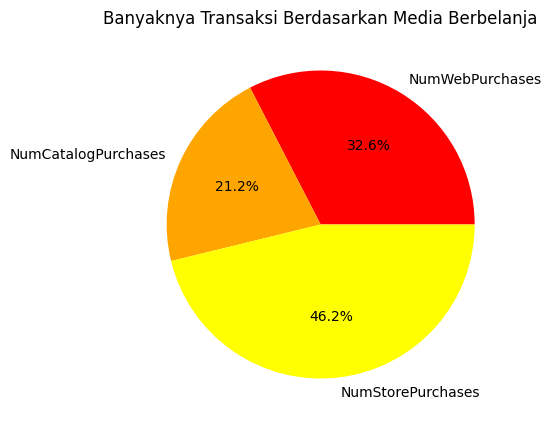

In [22]:
# MEDIA BERBELANJA TERFAVORIT
media_fav = data_cust[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().reset_index()
display(media_fav)

# DIAGRAM
plt.figure(figsize=(8,5))
plt.pie(media_fav[0], labels=media_fav['index'], autopct='%1.1f%%', colors=['red', 'orange', 'yellow'])
plt.title('Banyaknya Transaksi Berdasarkan Media Berbelanja')
plt.show()

Hasil dari diagram diatas, tertera bahwasannya customer paling banyak berbelanja langsung ke store A-mart sebanyak 46,2% setara dengan 12.970 customer. Selanjutnya, berbelanja melalui website dengan sebanyak 32,6% setara 9.150 customer. Serta 21,2% setara dengan 5.963 customer yang berbelanja melalui katalog perusahaan.

Analisis kedua mengetahui banyaknya jumlah setiap produk yang terjual. Banyaknya jumlah jenis penjualan produk berpengaruh terhadap:
1. Apakah jumlah penjualan setiap produk berpengaruh dengan adanya faktor keberadaan anak dan remaja dirumah?
2. Apakah jumlah penjualan setiap produk berpengaruh dengan adanya faktor umur customer?
3. Apakah jumlah penjualan setiap produk berpengaruh dengan adanya pendapatan customer?

,index,0
0,MntWines,680816
1,MntFruits,58917
2,MntMeatProducts,373968
3,MntFishProducts,84057
4,MntSweetProducts,60621
5,MntGoldProds,98609


C:\Users\Annisa\AppData\Local\Temp\ipykernel_1672\2924256851.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index', y=0, data=product_sell, palette=['red','orange','yellow','green','blue','purple'])
C:\Users\Annisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Annisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to p

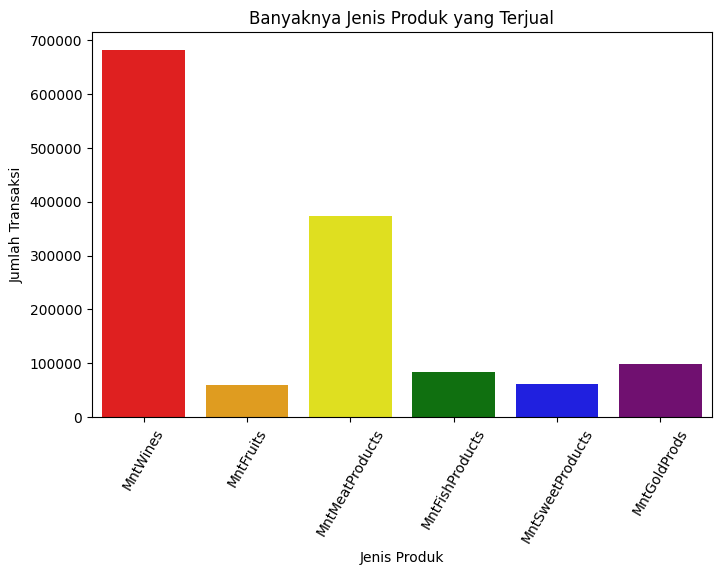

In [23]:
# JENIS PRODUK YANG TERJUAL
product_sell = data_cust[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum().reset_index()
display(product_sell)

# DIAGRAM
plt.figure(figsize=(8,5))
sns.barplot(x='index', y=0, data=product_sell, palette=['red','orange','yellow','green','blue','purple'])
plt.title('Banyaknya Jenis Produk yang Terjual')
plt.xlabel('Jenis Produk')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=60)
plt.show()

Jenis produk secara umum yang banyak terjual ialah produk wines atau minuman beralkohol. Hal ini masih belum dapat dipastikan apakah jenis penjualan produk berdasarkan faktor keberadaan anak dan remaja di rumah, umur, dan pendapatan customer?

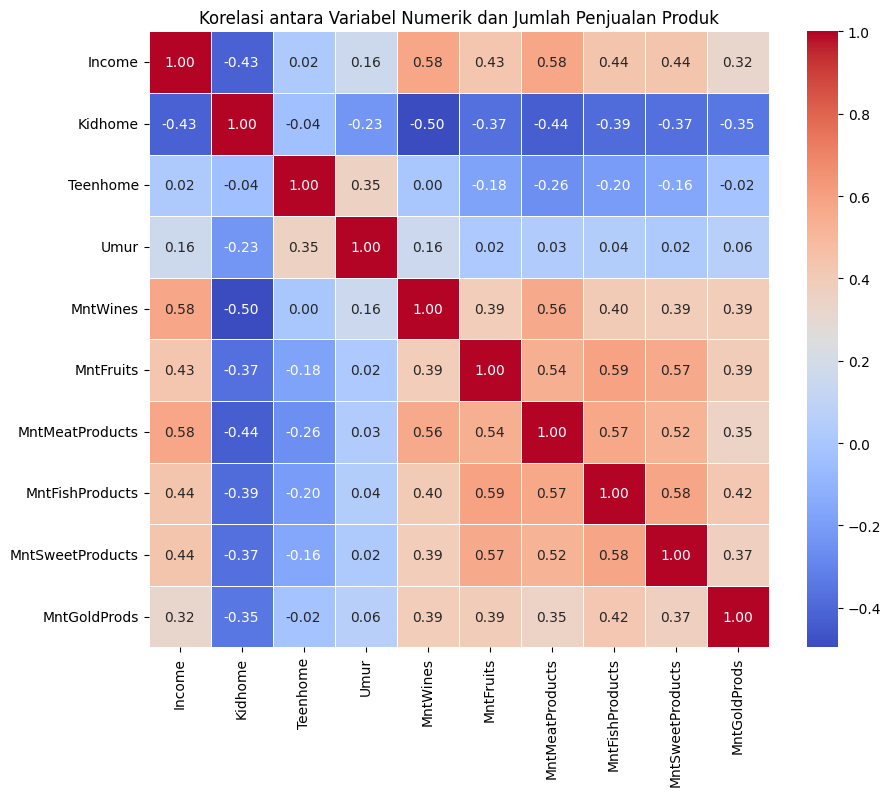

In [24]:
# MENGHITUNG KORELASI JENIS PENJUALAN PRODUK
correlation_matrix = data_cust[['Income', 'Kidhome',
       'Teenhome','Umur','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].corr()

# DIAGRAM
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelasi antara Variabel Numerik dan Jumlah Penjualan Produk')
plt.show()

Keterhubungan antara data numerik dengan jumlah penjualan produk hanya berpengaruh pada pendapatan saja. Utamanya pendapatan akan mempengaruhi dalam membeli produk wines dan meat di A-mart supermarket. Disisi lain, kolom kepemilikan anak dan remaja dan umur tidak berpengaruh terhadap jenis penjualan produk tertentu.

Detail hubungan income dengan jenis produk yang dibeli:

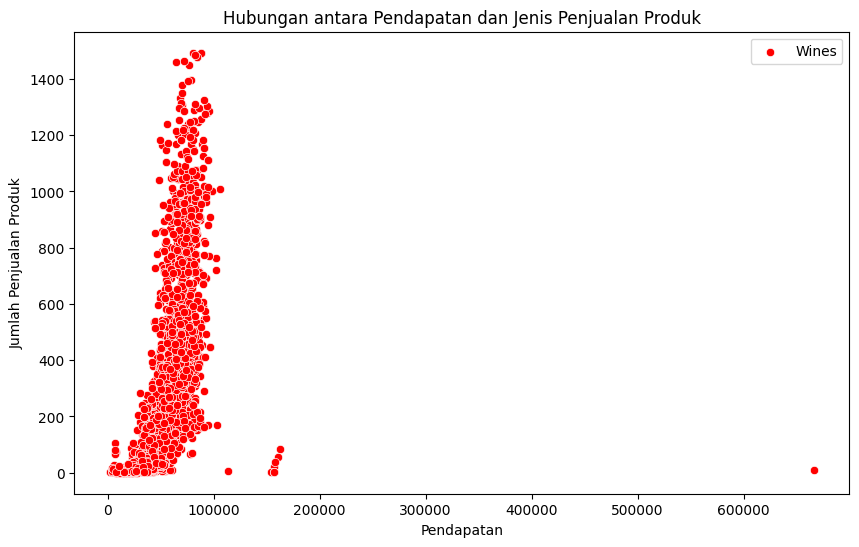

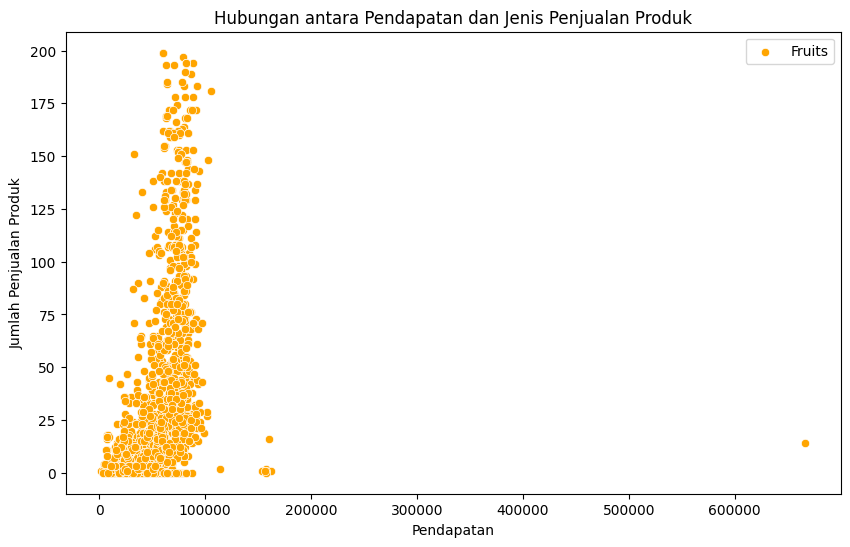

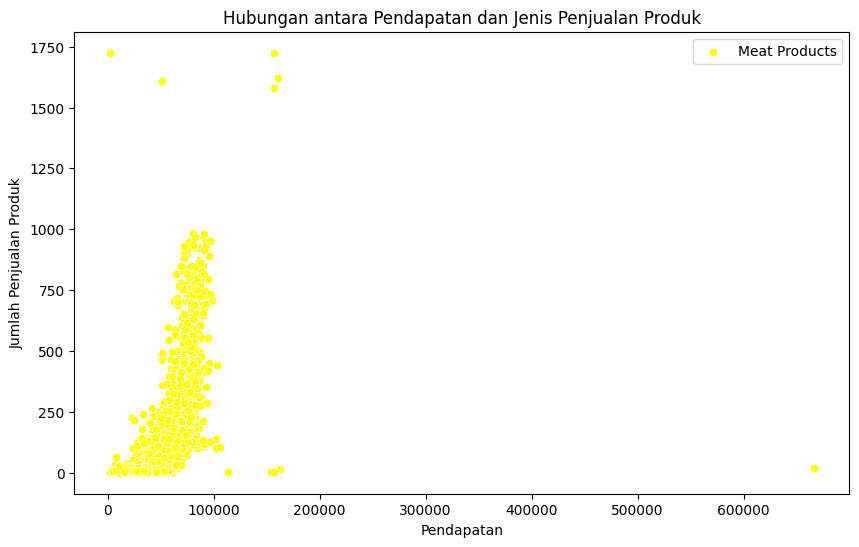

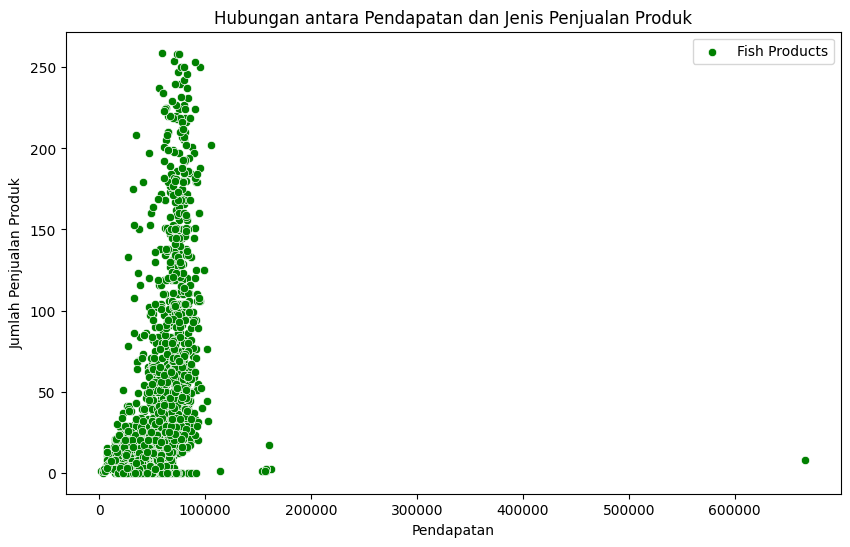

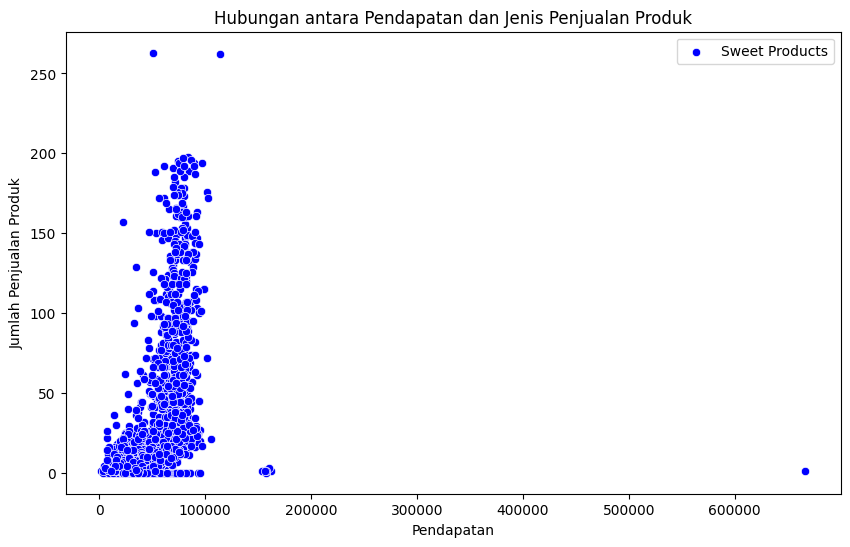

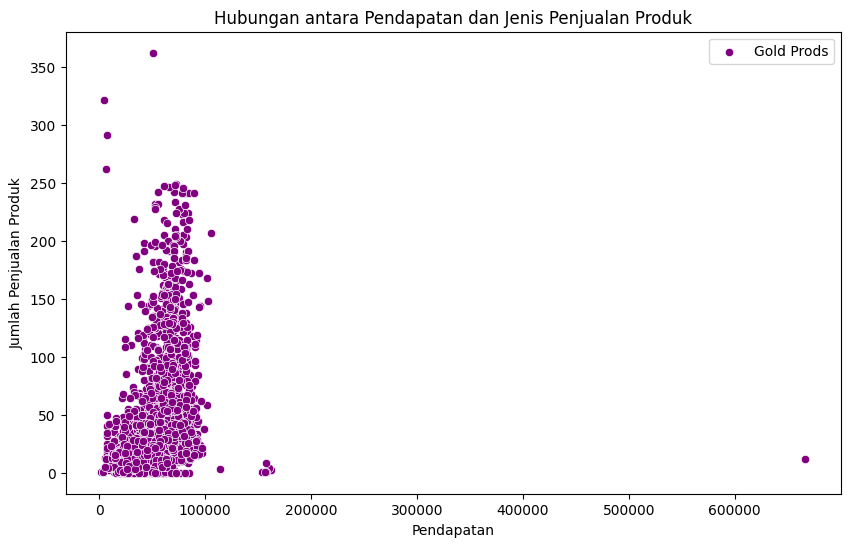

In [25]:
# HUBUNGAN PENDAPATAN DENGAN PENJUALAN JENIS PRODUK
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', data=data_cust, label='Wines', color='red')
plt.title('Hubungan antara Pendapatan dan Jenis Penjualan Produk')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Penjualan Produk')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntFruits', data=data_cust, label='Fruits', color='orange')
plt.title('Hubungan antara Pendapatan dan Jenis Penjualan Produk')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Penjualan Produk')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntMeatProducts', data=data_cust, label='Meat Products', color='yellow')
plt.title('Hubungan antara Pendapatan dan Jenis Penjualan Produk')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Penjualan Produk')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntFishProducts', data=data_cust, label='Fish Products', color='green')
plt.title('Hubungan antara Pendapatan dan Jenis Penjualan Produk')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Penjualan Produk')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntSweetProducts', data=data_cust, label='Sweet Products', color='blue')
plt.title('Hubungan antara Pendapatan dan Jenis Penjualan Produk')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Penjualan Produk')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntGoldProds', data=data_cust, label='Gold Prods', color='purple')
plt.title('Hubungan antara Pendapatan dan Jenis Penjualan Produk')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Penjualan Produk')
plt.legend()
plt.show()

Detail hubungan pendapatan dengan jenis penjualan produk berbanding lurus. Apabila pendapatan lebih besar, maka jenis produk yang dibeli cenderung yang lebih berharga. Sedangkan apabila pendapatan kecil, maka akan membeli jenis produk yang sesuai. Terlihat dari diagram penjualan produk daging dan emas. Kedua produk ini tersebar di rentang pendapatan yang rendah, maka itu jumlah penjualan produk pun tidak secara drastis terjual.

Analisis terakhir banyaknya rentang promosi yang dibutuhkan untuk menaikkan penjualan. Dibutuhkan berapa kali promosi untuk dapat menarik customer membeli produk yang berada di perusahaan?

C:\Users\Annisa\AppData\Local\Temp\ipykernel_1672\8386906.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  'AcceptedCmp5']].apply(pd.value_counts).transpose()


,0,1
AcceptedCmp1,2096,144
AcceptedCmp2,2210,30
AcceptedCmp3,2077,163
AcceptedCmp4,2073,167
AcceptedCmp5,2077,163


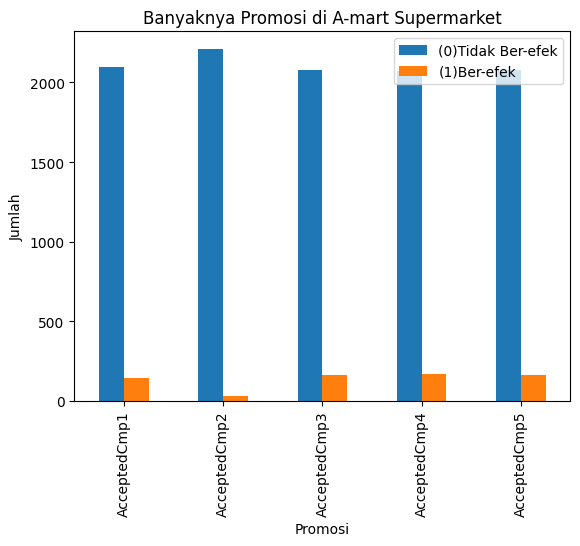

In [26]:
# JUMLAH NILAI CAMPAIGN
campaign_cust = data_cust[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5']].apply(pd.value_counts).transpose()

display(campaign_cust)

# DIAGRAM
campaign_cust.plot(kind='bar')
plt.title('Banyaknya Promosi di A-mart Supermarket')
plt.xlabel('Promosi')
plt.ylabel('Jumlah')
plt.legend(['(0)Tidak Ber-efek', '(1)Ber-efek'])
plt.xticks(rotation = 90)
plt.show()

5 kali promosi yang dijalankan A-mart supermarket tidak banyak mempengaruhi adanya kenaikan pendapatan bagi perusahaan. Lebih banyak customer yang tidak membeli pada saat diadakannya promosi. Namun, promosi yang dilakukan secara berkala akan meningkatkan pendapatan.

## **Kesimpulan dan Rekomendasi**

Dari analisis yang dilakukan, terdapat banyak data yang dapat disimpulkan:
- Transaksi jual-beli banyak dilakukan secara langsung di store A-mart supermarket dengan presentase 46,2%.
- Perbelanjaan melalui website terbilang cukup tinggi peminat dengan presentase 32,6%.
- Jenis produk yang banyak terjual ialah produk wines atau minumal beralkohol sebanyak 680.816 botol.
- Penjualan jenis produk hanya berdasarkan dari faktor pendapatan dan berbanding lurus.
- Nilai keefektifan dengan adanya promosi terhadap tingkat keuntungan perusahaan tidak terlalu tinggi.

**Rekomendasi**

1. Peningkatan Promosi
   Mengoptimalkan strategi promosi dapat meningkatkan efektivitas promosi. Utamanya menargetkan promosi kepada customer yang berbelanja secara langsung di store. Selain itu, menargetkan juga promosi kepada pelanggan yang berbelanja melalui website, karena presentasenya cukup tinggi.

2. Optimalkan Transaksi Online
   Peningkatan pengalaman pembelian online dapat meningkatkan frekuensi dan nilai transaksi melalui website. Ini dapat mencakup peningkatan keamanan, kenyamanan, dan penawaran khusus online ataupun website perusahaan.

3. Evaluasi Strategi Penjualan di Store
   Melakukan evaluasi lebih lanjut terhadap transaksi yang dilakukan di store dapat membantu memahami preferensi pelanggan. Peningkatan layanan atau penawaran spesial di store dapat meningkatkan kunjungan pelanggan.

4. Diversifikasi Produk
   Meskipun produk wines sangat diminati, mencoba untuk diversifikasi jenis produk atau menghadirkan produk-produk baru dapat meningkatkan variasi dan minat pelanggan. Selain itu, pada produk yang banyak demand perlu juga diperbanyak untuk stok penjualan.
